In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("tpphu").getOrCreate()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 57146)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/conda/lib/python3.11/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/opt/conda/lib/python3.11/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/conda/lib/python3.11/socketserver.py", line 755, in __init__
    self.handle()
  File "/usr/local/spark/python/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/usr/local/spark/python/pyspark/accumulators.py", line 267, in poll
    if self.rfile in r and func():
                           ^^^^^^
  File "/usr/local/spark/python/pyspark/accumulators.py", line 271, in accum_updates
    num_updates =

In [3]:
import pyspark.sql.functions as F

# Create a DataFrame with a single column
df = spark.createDataFrame([(1, 2), (3, 4)], ["col1", "col2"])

# Add a new column with a constant value of 10 to the DataFrame
df = df.withColumn("new_col", F.lit(10))

df.show()

+----+----+-------+
|col1|col2|new_col|
+----+----+-------+
|   1|   2|     10|
|   3|   4|     10|
+----+----+-------+



# Review productions file

In [4]:
df_productions = spark.read.csv("Productions.csv", header=True,inferSchema=True)
df_productions.printSchema()

root
 |-- productid: integer (nullable = true)
 |-- productname: string (nullable = true)
 |-- quantityperunit: string (nullable = true)
 |-- unitprice: double (nullable = true)
 |-- unitsinstock: integer (nullable = true)



In [5]:
df_productions.show()

+---------+--------------------+--------------------+---------+------------+
|productid|         productname|     quantityperunit|unitprice|unitsinstock|
+---------+--------------------+--------------------+---------+------------+
|        1|                Chai|  10 boxes x 30 bags|     18.0|          39|
|        2|               Chang|  24 - 12 oz bottles|     19.0|          17|
|        3|       Aniseed Syrup| 12 - 550 ml bottles|     10.0|          13|
|        4|Chef Anton's Caju...|      48 - 6 oz jars|     22.0|          53|
|        5|Chef Anton's Gumb...|            36 boxes|    21.35|           0|
|        6|Grandma's Boysenb...|      12 - 8 oz jars|     25.0|         120|
|        7|Uncle Bob's Organ...|     12 - 1 lb pkgs.|     30.0|          15|
|        8|Northwoods Cranbe...|     12 - 12 oz jars|     40.0|           6|
|        9|     Mishi Kobe Niku|    18 - 500 g pkgs.|     97.0|          29|
|       10|               Ikura|    12 - 200 ml jars|     31.0|          31|

# Review orders file

In [15]:
df_orders = spark.read.csv("Orders.csv", header=True, inferSchema=True)
df_orders.printSchema()

root
 |-- orderid: integer (nullable = true)
 |-- customerid: string (nullable = true)
 |-- orderdate: string (nullable = true)



In [7]:
df_orders.show()

+-------+----------+---------+
|orderid|customerid|orderdate|
+-------+----------+---------+
|  10248|     VINET| 7/4/1996|
|  10249|     TOMSP| 7/5/1996|
|  10250|     HANAR| 7/8/1996|
|  10251|     VICTE| 7/8/1996|
|  10252|     SUPRD| 7/9/1996|
|  10253|     HANAR|7/10/1996|
|  10254|     CHOPS|7/11/1996|
|  10255|     RICSU|7/12/1996|
|  10256|     WELLI|7/15/1996|
|  10257|     HILAA|7/16/1996|
|  10258|     ERNSH|7/17/1996|
|  10259|     CENTC|7/18/1996|
|  10260|     OTTIK|7/19/1996|
|  10261|     QUEDE|7/19/1996|
|  10262|     RATTC|7/22/1996|
|  10263|     ERNSH|7/23/1996|
|  10264|     FOLKO|7/24/1996|
|  10265|     BLONP|7/25/1996|
|  10266|     WARTH|7/26/1996|
|  10267|     FRANK|7/29/1996|
+-------+----------+---------+
only showing top 20 rows



In [16]:
#Chuyển cột orderdate thành kiểu date
from pyspark.sql.functions import to_date

df_orders = df_orders.withColumn('orderdate', to_date(df_orders['orderdate'], 'M/d/yyyy'))
df_orders.printSchema()

root
 |-- orderid: integer (nullable = true)
 |-- customerid: string (nullable = true)
 |-- orderdate: date (nullable = true)



In [17]:
df_orderdetails = spark.read.csv("Order-details.csv", header=True, inferSchema=True)
df_orderdetails.printSchema()

root
 |-- orderid: integer (nullable = true)
 |-- productid: integer (nullable = true)
 |-- unitprice: double (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- discount: double (nullable = true)



In [18]:
df_orders.show()

+-------+----------+----------+
|orderid|customerid| orderdate|
+-------+----------+----------+
|  10248|     VINET|1996-07-04|
|  10249|     TOMSP|1996-07-05|
|  10250|     HANAR|1996-07-08|
|  10251|     VICTE|1996-07-08|
|  10252|     SUPRD|1996-07-09|
|  10253|     HANAR|1996-07-10|
|  10254|     CHOPS|1996-07-11|
|  10255|     RICSU|1996-07-12|
|  10256|     WELLI|1996-07-15|
|  10257|     HILAA|1996-07-16|
|  10258|     ERNSH|1996-07-17|
|  10259|     CENTC|1996-07-18|
|  10260|     OTTIK|1996-07-19|
|  10261|     QUEDE|1996-07-19|
|  10262|     RATTC|1996-07-22|
|  10263|     ERNSH|1996-07-23|
|  10264|     FOLKO|1996-07-24|
|  10265|     BLONP|1996-07-25|
|  10266|     WARTH|1996-07-26|
|  10267|     FRANK|1996-07-29|
+-------+----------+----------+
only showing top 20 rows



In [19]:
df_orderdetails.show()

+-------+---------+---------+--------+--------+
|orderid|productid|unitprice|quantity|discount|
+-------+---------+---------+--------+--------+
|  10248|       11|     14.0|      12|     0.0|
|  10248|       42|      9.8|      10|     0.0|
|  10248|       72|     34.8|       5|     0.0|
|  10249|       14|     18.6|       9|     0.0|
|  10249|       51|     42.4|      40|     0.0|
|  10250|       41|      7.7|      10|     0.0|
|  10250|       51|     42.4|      35|    0.15|
|  10250|       65|     16.8|      15|    0.15|
|  10251|       22|     16.8|       6|    0.05|
|  10251|       57|     15.6|      15|    0.05|
|  10251|       65|     16.8|      20|     0.0|
|  10252|       20|     64.8|      40|    0.05|
|  10252|       33|      2.0|      25|    0.05|
|  10252|       60|     27.2|      40|     0.0|
|  10253|       31|     10.0|      20|     0.0|
|  10253|       39|     14.4|      42|     0.0|
|  10253|       49|     16.0|      40|     0.0|
|  10254|       24|      3.6|      15|  

In [20]:
#Liệt kê những đơn hàng trước ngày 1996-07-20
df_orders.filter(df_orders['orderdate']<"1996-07-20").show()
#Liệt kê những đơn hàng năm 1996
from pyspark.sql.functions import year
df_orders.filter(year(df_orders['orderdate'])==1996).show()
#Đếm số mặt hàng trong từng đơn hàng
df_orderdetails.groupBy('orderid').count().show()

+-------+----------+----------+
|orderid|customerid| orderdate|
+-------+----------+----------+
|  10248|     VINET|1996-07-04|
|  10249|     TOMSP|1996-07-05|
|  10250|     HANAR|1996-07-08|
|  10251|     VICTE|1996-07-08|
|  10252|     SUPRD|1996-07-09|
|  10253|     HANAR|1996-07-10|
|  10254|     CHOPS|1996-07-11|
|  10255|     RICSU|1996-07-12|
|  10256|     WELLI|1996-07-15|
|  10257|     HILAA|1996-07-16|
|  10258|     ERNSH|1996-07-17|
|  10259|     CENTC|1996-07-18|
|  10260|     OTTIK|1996-07-19|
|  10261|     QUEDE|1996-07-19|
+-------+----------+----------+

+-------+----------+----------+
|orderid|customerid| orderdate|
+-------+----------+----------+
|  10248|     VINET|1996-07-04|
|  10249|     TOMSP|1996-07-05|
|  10250|     HANAR|1996-07-08|
|  10251|     VICTE|1996-07-08|
|  10252|     SUPRD|1996-07-09|
|  10253|     HANAR|1996-07-10|
|  10254|     CHOPS|1996-07-11|
|  10255|     RICSU|1996-07-12|
|  10256|     WELLI|1996-07-15|
|  10257|     HILAA|1996-07-16|
|  1025

In [21]:
#Tính tổng tiền của từng đơn hàng
from pyspark.sql.functions import col
#Thêm cột amount tính thành tiền từng mặt hàng trong đơn hàng
df_orderdetail_withamount = df_orderdetails.withColumn("amount", col('unitprice')*col('quantity')*(1-col('discount')))
#Phân nhóm và tính tổng tiền của từng đơn hàng
df_orderdetail_withamount.groupBy('orderid').sum('amount').show()

+-------+------------------+
|orderid|       sum(amount)|
+-------+------------------+
|  10362|            1549.6|
|  10623|           1336.95|
|  10817|         10952.845|
|  11033|            3232.8|
|  10462|156.00000000000003|
|  10703|            2545.0|
|  10914|             537.5|
|  10708|             180.4|
|  10798|             446.6|
|  10862|             581.0|
|  11025|             270.0|
|  10468|             717.6|
|  10745|            4529.8|
|  10768|            1477.0|
|  10395|           2122.92|
|  10527|            1503.0|
|  10567|            2519.0|
|  10632|             589.0|
|  10788|             731.5|
|  10815|              40.0|
+-------+------------------+
only showing top 20 rows



In [24]:
from pyspark.sql.functions import month
#Tính tổng tiền bán hàng trong từng tháng của năm 1999
#Nối đơn hàng với chi tiết đơn hàng và lọc những đơn hàng năm 1996
df_order_full = df_orderdetail_withamount.join(df_orders.filter(year(col('orderdate'))==1996), 'orderid','inner')
#Thêm cột month
df_order_full = df_order_full.withColumn('month',month(col('orderdate')))
#Phân nhóm theo tháng và tính tổng thành tiền
sum_amount_by_month = df_order_full.groupby('month').sum('amount').orderBy('month').collect()

In [27]:
df_order_full.groupby('month').sum('amount').orderBy('month').show()

+-----+------------------+
|month|       sum(amount)|
+-----+------------------+
|    7|27861.894999999997|
|    8|25485.275000000005|
|    9|26381.399999999998|
|   10| 37515.72499999999|
|   11|         45600.045|
|   12| 45239.63000000001|
+-----+------------------+



In [25]:
print(sum_amount_by_month)

[Row(month=7, sum(amount)=27861.894999999997), Row(month=8, sum(amount)=25485.275000000005), Row(month=9, sum(amount)=26381.399999999998), Row(month=10, sum(amount)=37515.72499999999), Row(month=11, sum(amount)=45600.045), Row(month=12, sum(amount)=45239.63000000001)]


In [28]:
#Lấy danh sách tháng và tổng thành tiền từng tháng
m = [tuple(row)[0] for row in sum_amount_by_month]
a = [tuple(row)[1] for row in sum_amount_by_month]

In [29]:
print(m)
print(a)

[7, 8, 9, 10, 11, 12]
[27861.894999999997, 25485.275000000005, 26381.399999999998, 37515.72499999999, 45600.045, 45239.63000000001]


<BarContainer object of 6 artists>

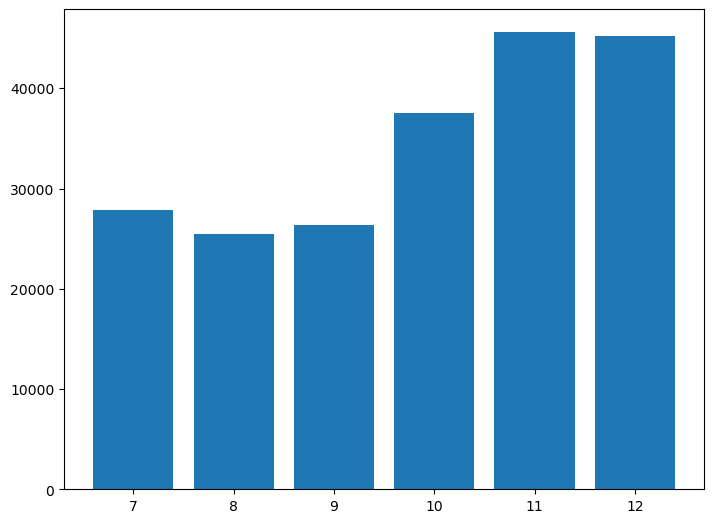

In [30]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(m, a)

4. Nội dung thực hành
4.1 Cho biết những khách hàng ở USA.
4.2 Cho biết tên, đơn giá, số lượng tồn kho của những sản phẩm tồn kho hơn 100 sản phẩm
4.3 Cho biết những đơn hàng trong quý 2 năm 1997
4.4 Cho biết tên khách hàng (công ty) của đơn hàng có mã 10252
4.5 Đếm số mặt hàng trong từng đơn hàng
4.6 Tính số đơn hàng và tổng tiền của khách hàng có mã 10252
4.7 Cho biết số lượng đơn hàng và tổng tiền bán từng ngày trong tháng 1 năm 1997.
4.8 Tính số lượng, tổng tiền, đơn giá bán bình quân của từng mặt hàng
4.9 Cho biết tên những mặt hàng chưa bán được
4.10 Cho biết tên những mặt hàng bán nhiều nhất theo số lượng
4.11 Vẽ biểu đồ cột biểu diễn thành tiền bán của 10 mặt hàng bán nhiều nhất trong năm 1997
4.12 Vẽ biểu đồ cột so sánh số tiền bán được theo tháng của từng năm
4.13 Vẽ biểu đồ đường biểu diễn số lượng bán được từng tháng/năm của mặt hàng có nhiều đơn
hàng nhất
4.14 Cho biết những cặp khách hàng mua giống nhau từ 5 mặt hàng trở lên, đó là những mặt
hàng nào?
4.15 Cho biết trong những cặp khách hàng (c1, c2) mua giống nhau hơn 5 mặt hàng thì những
mặt hàng nào khách hàng c1 mua mà khách hàng c2 chưa mua.

In [31]:
# 4.1 Cho biết những khách hàng ở USA.
df_customers = spark.read.csv("Customers.csv", header=True, inferSchema=True)
df_customers.printSchema()

root
 |-- customerid: string (nullable = true)
 |-- companyname: string (nullable = true)
 |-- contactname: string (nullable = true)
 |-- contacttitle: string (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- phone: string (nullable = true)



In [34]:
df_customers.filter(df_customers['country']=='USA').show()

+----------+--------------------+------------------+--------------------+--------------------+-------------+-------+--------------+
|customerid|         companyname|       contactname|        contacttitle|             address|         city|country|         phone|
+----------+--------------------+------------------+--------------------+--------------------+-------------+-------+--------------+
|     GREAL|Great Lakes Food ...|     Howard Snyder|   Marketing Manager|    2732 Baker Blvd.|       Eugene|    USA|(503) 555-7555|
|     HUNGC|Hungry Coyote Imp...|     Yoshi Latimer|Sales Representative|City Center Plaza...|        Elgin|    USA|(503) 555-6874|
|     LAZYK|Lazy K Kountry Store|        John Steel|   Marketing Manager|12 Orchestra Terrace|  Walla Walla|    USA|(509) 555-7969|
|     LETSS|   Let's Stop N Shop|      Jaime Yorres|               Owner| 87 Polk St. Suite 5|San Francisco|    USA|(415) 555-5938|
|     LONEP|Lonesome Pine Res...|       Fran Wilson|       Sales Manager|  8

In [37]:
# 4.2 Cho biết tên, đơn giá, số lượng tồn kho của những sản phẩm tồn kho hơn 100 sản phẩm

df_product_in_stock = df_productions.filter(df_productions['unitsinstock'] > 100) \
    .select('productid','productname','unitprice','unitsinstock')
df_product_in_stock.show()

+---------+--------------------+---------+------------+
|productid|         productname|unitprice|unitsinstock|
+---------+--------------------+---------+------------+
|        6|Grandma's Boysenb...|     25.0|         120|
|       22| Gustaf's Knäckebröd|     21.0|         104|
|       33|             Geitost|      2.5|         112|
|       34|       Sasquatch Ale|     14.0|         111|
|       36|         Inlagd Sill|     19.0|         112|
|       40|    Boston Crab Meat|     18.4|         123|
|       55|        Pâté chinois|     24.0|         115|
|       61|      Sirop d'érable|     28.5|         113|
|       73|          Röd Kaviar|     15.0|         101|
|       75|Rhönbräu Klosterbier|     7.75|         125|
+---------+--------------------+---------+------------+



In [48]:
# 4.3 Cho biết những đơn hàng trong quý 2 năm 1997
# df_orders.show()
from pyspark.sql.functions import month, year

# df_orders.filter(year(df_orders['orderdate'])==1997) \
#     .filter((month(df_orders['orderdate'])== 4\
#     | month(df_orders['orderdate'])==5 \
#     | month(df_orders['orderdate'])==6)) \
#     .show()

df_orders.filter(year(df_orders['orderdate']) == 1997) \
    .filter((month(df_orders['orderdate']) == 4) |
            (month(df_orders['orderdate']) == 5) |
            (month(df_orders['orderdate']) == 6)) \
    .show()


+-------+----------+----------+
|orderid|customerid| orderdate|
+-------+----------+----------+
|  10492|     BOTTM|1997-04-01|
|  10493|     LAMAI|1997-04-02|
|  10494|     COMMI|1997-04-02|
|  10495|     LAUGB|1997-04-03|
|  10496|     TRADH|1997-04-04|
|  10497|     LEHMS|1997-04-04|
|  10498|     HILAA|1997-04-07|
|  10499|     LILAS|1997-04-08|
|  10500|     LAMAI|1997-04-09|
|  10501|     BLAUS|1997-04-09|
|  10502|     PERIC|1997-04-10|
|  10503|     HUNGO|1997-04-11|
|  10504|     WHITC|1997-04-11|
|  10505|     MEREP|1997-04-14|
|  10506|     KOENE|1997-04-15|
|  10507|     ANTON|1997-04-15|
|  10508|     OTTIK|1997-04-16|
|  10509|     BLAUS|1997-04-17|
|  10510|     SAVEA|1997-04-18|
|  10511|     BONAP|1997-04-18|
+-------+----------+----------+
only showing top 20 rows



In [51]:
df_orders.show()

+-------+----------+----------+
|orderid|customerid| orderdate|
+-------+----------+----------+
|  10248|     VINET|1996-07-04|
|  10249|     TOMSP|1996-07-05|
|  10250|     HANAR|1996-07-08|
|  10251|     VICTE|1996-07-08|
|  10252|     SUPRD|1996-07-09|
|  10253|     HANAR|1996-07-10|
|  10254|     CHOPS|1996-07-11|
|  10255|     RICSU|1996-07-12|
|  10256|     WELLI|1996-07-15|
|  10257|     HILAA|1996-07-16|
|  10258|     ERNSH|1996-07-17|
|  10259|     CENTC|1996-07-18|
|  10260|     OTTIK|1996-07-19|
|  10261|     QUEDE|1996-07-19|
|  10262|     RATTC|1996-07-22|
|  10263|     ERNSH|1996-07-23|
|  10264|     FOLKO|1996-07-24|
|  10265|     BLONP|1996-07-25|
|  10266|     WARTH|1996-07-26|
|  10267|     FRANK|1996-07-29|
+-------+----------+----------+
only showing top 20 rows



In [54]:
# 4.4 Cho biết tên khách hàng (công ty) của đơn hàng có mã 10252
df_customers.join(df_orders.filter(df_orders['orderid'] == 10252), 'customerid','inner').select('companyname').show()

+----------------+
|     companyname|
+----------------+
|Suprêmes délices|
+----------------+

